# EDA: Moscow Food Service Market

- **Author**: Ekaterina Kemenova
- **Date**: 23.10.2025

## 0.1 Project goals and objectives

**Goal:**
Conduct an exploratory analysis of the Moscow food service market as of summer 2022 in order to understand its structure and key features and to support data-driven decision-making on market entry.

**Context:**
Investors are considering entering the Moscow food service market by opening a new venue but have not yet defined the format, location, or pricing strategy. To inform strategic choices, they require an exploratory analysis of the current market landscape based on publicly available data.


**Key objectives:**
- Load and explore the structure of datasets;
- Clean and prepare the data (handle missing values, duplicates, incorrect data types);
- Engineer additional features required for analysis;
- Conduct an exploratory data analysis and answer key business questions:
    - What types of food service venues are represented in the data;
    - How venues are distributed across Moscow administrative districts;
    - The proportion of chain vs. independent venues and how it varies by category;
    - The presence of outliers and typical values in seating capacity;
    - Differences in average ratings across venue categories;
    - Factors most strongly correlated with venue ratings;
    - Identification of the top 15 most widespread chains in Moscow and their categories;
    - The relationship between distance from the city center and pricing levels;
- Build appropriate visualizations to support each step;
- Summarize findings and provide data-driven recommendations.

## 0.2 Data description

The project uses data from two datasets — `rest_info.csv` and `rest_price.csv` — containing information on food service venues in Moscow as of summer 2022:

**rest_info.csv:**
- `name` — venue name  
- `address` — venue address  
- `district` — administrative district of Moscow where the venue is located (e.g., Central Administrative District)  
- `category` — venue category (e.g., café, pizzeria, coffee shop)  
- `hours` — opening days and hours  
- `rating` — user rating from Yandex Maps (maximum score: 5.0)  
- `chain` — binary indicator of whether the venue is part of a chain (0 — non-chain, 1 — chain);
- `seats` — number of seating places  

**rest_price.csv:**
- `price` — price category of the venue (e.g., average, below average, above average)  
- `avg_bill` — text field describing typical prices as a range, for example:  
  - “Average bill: 1000–1500 RUB”  
  - “Cappuccino price: 130–220 RUB”  
  - “Beer price: 400–600 RUB”  
- `middle_avg_bill` — numeric estimate of the average bill, populated only when `avg_bill` starts with “Average bill”:  
  - if a range is provided, the median of the range is used;  
  - if a single value is provided, that value is used;  
  - otherwise, the field is left empty.  
- `middle_coffee_cup` — numeric estimate of the price of one cappuccino, populated only when `avg_bill` starts with “Cappuccino price”, following the same logic as above.


## 0.3 Project structure

1. [Data loading and overview](#data-loading-and-overview)
2. [Data preprocessing](#data-preprocessing)  
3. [Exploratory data analysis](#exploratory-data-analysis)
4. [Final conclusions and recommendations](#final-conclusions-and-recommendations)

---

<a id='data-loading-and-overview'></a>
## 1. Data loading and overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix

In [2]:
df_rest = pd.read_csv('rest_info.csv')
df_price = pd.read_csv('rest_price.csv')

In [3]:
def review_data(df):
    print('General dataset information:')
    df.info()
    
    print('\nFirst 5 rows of the dataset:')
    display(df.head())
    
    missing_summary = pd.DataFrame({
        'missing_count': df.isna().sum(),
        'missing_share': df.isna().mean()
    }).sort_values(by='missing_count', ascending=False)
    
    print('\nMissing values summary:')
    display(missing_summary)
    
    print('\nNumber of duplicate rows:')
    print(df.duplicated().sum())
    
    print('\nDescriptive statistics for numerical columns:')
    display(df.describe())

In [4]:
review_data(df_rest)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB

First 5 rows of the dataset:


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0



Missing values summary:


,missing_count,missing_share
seats,3611,0.429574
hours,536,0.063764
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
rating,0,0.000000
chain,0,0.000000



Number of duplicate rows:
0

Descriptive statistics for numerical columns:


,rating,chain,seats
count,8406.000000,8406.000000,4795.000000
mean,4.229895,0.381275,108.421689
std,0.470348,0.485729,122.833396
min,1.000000,0.000000,0.000000
25%,4.100000,0.000000,40.000000
50%,4.300000,0.000000,75.000000
75%,4.400000,1.000000,140.000000
max,5.000000,1.000000,1288.000000


In [5]:
review_data(df_price)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB

First 5 rows of the dataset:


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN



Missing values summary:


,missing_count,missing_share
middle_coffee_cup,3523,0.868162
middle_avg_bill,909,0.224002
price,743,0.183095
avg_bill,242,0.059635
id,0,0.000000



Number of duplicate rows:
0

Descriptive statistics for numerical columns:


,middle_avg_bill,middle_coffee_cup
count,3149.000000,535.000000
mean,958.053668,174.721495
std,1009.732845,88.951103
min,0.000000,60.000000
25%,375.000000,124.500000
50%,750.000000,169.000000
75%,1250.000000,225.000000
max,35000.000000,1568.000000


The `rest_info.csv` dataset contains **9 columns and 8,406 rows**. The data matches the description, column names accurately reflect their contents. The data types are generally appropriate. Missing values are present in two columns: `hours` and `seats`.

The `rest_price.csv` dataset contains **5 columns and 4,058 rows**. The data is consistent with its description, column names accurately reflect their contents. Data types are correctly assigned. Missing values are observed in four columns: `price`, `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup`.

We merge the two datasets into a single dataframe for further analysis.:

In [6]:
df = df_rest.merge(df_price, on = 'id', how = 'left')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


<a id='data-preprocessing'></a>
## 2. Data preprocessing

We downcast numeric columns to optimize memory usage:

In [8]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['rating'] = pd.to_numeric(df['rating'], downcast='float')

We examine missing values:

In [9]:
missing_summary = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_share': df.isna().mean()
}).sort_values(by='missing_count', ascending=False)

missing_summary

,missing_count,missing_share
middle_coffee_cup,7871,0.936355
middle_avg_bill,5257,0.625387
price,5091,0.605639
avg_bill,4590,0.546039
seats,3611,0.429574
hours,536,0.063764
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000


We check whether missing values in the `seats` column are associated with venue types that typically do not have seating (such as bakeries):


In [10]:
seats_na_count = df[df['seats'].isna()]['category'].value_counts()
seats_notna_count = df[df['seats'].notna()]['category'].value_counts()

seats_na_share = (seats_na_count / (seats_na_count + seats_notna_count)).sort_values(ascending=False)
print (seats_na_share)

кафе               0.487805
столовая           0.479365
кофейня            0.468507
булочная           0.421875
быстрое питание    0.421227
бар,паб            0.388235
ресторан           0.378365
пиццерия           0.325434
Name: category, dtype: float64


Our assumption was not confirmed: missing values in the `seats` column are present across all venue categories.

Next, we test two further assumptions:
- The columns `middle_avg_bill` and `middle_coffee_cup` are mutually exclusive: when one is filled, the other is missing.
- Records where `avg_bill` refers to the “Beer price” do not contain values in either `middle_avg_bill` or `middle_coffee_cup`.

In [11]:
df[df['middle_avg_bill'].notna() & df['middle_coffee_cup'].notna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [12]:
df[df['avg_bill'].str.contains('Цена бокала пива', na=False) & (df['middle_avg_bill'].notna() | df['middle_coffee_cup'].notna())]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


The analysis confirms both assumptions.

Six columns contain missing values: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup`.

Missing values in `hours` represent less than 1% of the data and are not expected to impact the analysis. The other columns exhibit a high proportion of missing data, from 42.9% in `seats` to 93.6% in `middle_coffee_cup`. For `seats`, `price`, and `avg_bill`, these gaps most likely reflect the absence of reported information rather than data quality issues.

The missing values in `middle_avg_bill` and `middle_coffee_cup` are structurally valid, as these features are extracted from `avg_bill`. Specifically, only one of the two can be populated at a time, and entries referring to items such as beer prices result in both fields being empty. 

Therefore, these missing values are preserved to maintain data integrity.

Next, we check the data for explicit and implicit duplicates:

In [13]:
df.duplicated().sum()

0

In [14]:
df['id'].nunique()

8406

In [15]:
for column in ['category','district','price']:
    print (f'\nUnique values in the {column} column:')
    print (df[column].unique())


Unique values in the category column:
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

Unique values in the district column:
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']

Unique values in the price column:
[nan 'выше среднего' 'средние' 'высокие' 'низкие']


In [16]:
for column in ['name','address','hours']:
    df[column] = df[column].str.lower().str.strip()

In [17]:
df.duplicated(subset=['name','address']).sum()

4

In [18]:
df = df.drop_duplicates(subset=['name','address'])
df.duplicated(subset=['name','address']).sum()

0

Create a new column `is_24_7` that flags whether a venue operates 24 hours a day, 7 days a week:

In [19]:
df['is_24_7'] = (df['hours'].str.contains('ежедневно', na=False)) & (df['hours'].str.contains('круглосуточно', na=False))

The data preprocessing stage included the following actions:

- **Data type conversion:** Numeric columns (`chain`, `rating`) were downcast to optimize memory usage;
- **Handling missing values:** Missing values were intentionally retained to prevent artificial data imputation and potential bias;
- **Duplicate detection:** No explicit duplicates were detected. After text normalization in the `name` and `address` columns, 4 implicit duplicates were identified and removed;
- **Feature engineering:** An additional feature, `is_24_7`, was introduced to indicate round-the-clock (24/7) operation.

Overall, preprocessing resulted in the removal of 4 rows, representing less than 0.1% of the original data.

<a id='exploratory-data-analysis'></a>
## 3. Exploratory data analysis

### 3.1 Analysis of venue categories

In [20]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

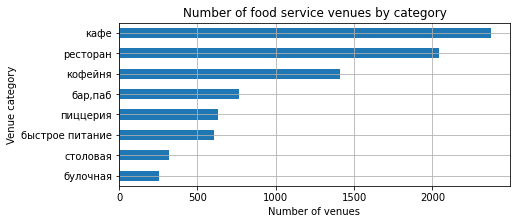

In [21]:
plt.figure (figsize = (7,3))
df['category'].value_counts().sort_values(ascending=True).plot(
                kind='barh',
                title='Number of food service venues by category',
                rot=0,
                legend=False)
plt.xlabel('Number of venues')
plt.ylabel('Venue category')
plt.grid()
plt.show()

The top 3 food service categories in Moscow by number of venues: **cafés** (2,376), **restaurants** (2,042), and **coffee shops** (1,413).

The least represented categories are canteens (315 venues) and bakeries (256).

---
### 3.2 Distribution of food service venues by administrative district

In [22]:
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [23]:
df['district'].value_counts(normalize=True)

Центральный административный округ         0.266841
Северный административный округ            0.106879
Южный административный округ               0.106165
Северо-Восточный административный округ    0.105927
Западный административный округ            0.101166
Восточный административный округ           0.094977
Юго-Восточный административный округ       0.084980
Юго-Западный административный округ        0.084385
Северо-Западный административный округ     0.048679
Name: district, dtype: float64

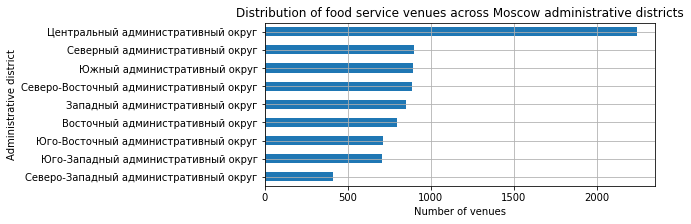

In [24]:
plt.figure (figsize = (7,3))
df['district'].value_counts().sort_values(ascending=True).plot(
                kind='barh',
                title='Distribution of food service venues across Moscow administrative districts',
                rot=0,
                legend=False)
plt.xlabel('Number of venues')
plt.ylabel('Administrative district')
plt.grid()
plt.show()

In [25]:
df[df['district'] == 'Центральный административный округ']['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

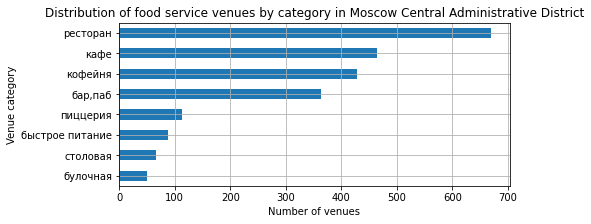

In [26]:
plt.figure (figsize = (7,3))
df[df['district'] == 'Центральный административный округ']['category'].value_counts().sort_values(ascending=True).plot(
                kind='barh',
                title='Distribution of food service venues by category in Moscow Central Administrative District',
                rot=0,
                legend=False)
plt.xlabel('Number of venues')
plt.ylabel('Venue category')
plt.grid()
plt.show()

The largest concentration of food service venues is observed in the **Central Administrative District of Moscow** (2,242 venues). In other districts, the number of venues is relatively uniform, ranging between 700 and 900. The lowest number of venues is recorded in the North-Western Administrative District (409).

In the Central Administrative District, **restaurants** represent the largest category (670 venues), followed by cafés, coffee shops, and bars/pubs.

---

### 3.3 Chain vs. independent venues

In [27]:
df['chain'].value_counts(normalize=True)

0    0.618781
1    0.381219
Name: chain, dtype: float64

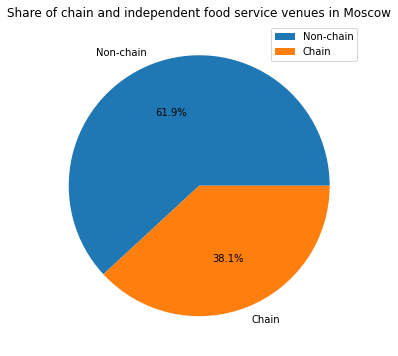

In [28]:
plt.figure (figsize = (6,6))
df['chain'].value_counts(normalize=True).plot(
                kind='pie',
                title='Share of chain and independent food service venues in Moscow',
                labels=['Non-chain','Chain'],
                ylabel='',
                autopct='%1.1f%%',
                legend=True)
plt.show()

In [29]:
chain_share = df[df['chain'] == 1]['category'].value_counts() / df['category'].value_counts()
chain_share.sort_values(ascending=False)

булочная           0.613281
пиццерия           0.521327
кофейня            0.509554
быстрое питание    0.384743
ресторан           0.357003
кафе               0.327862
столовая           0.279365
бар,паб            0.219895
Name: category, dtype: float64

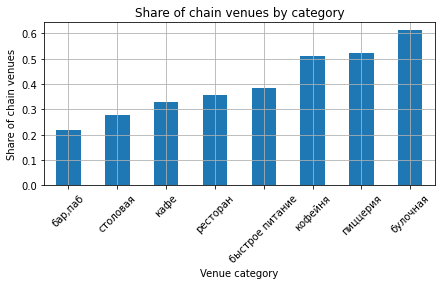

In [30]:
plt.figure (figsize = (7,3))
chain_share.sort_values(ascending=True).plot(
                kind='bar',
                title='Share of chain venues by category',
                rot=45,
                xlabel='Venue category',
                ylabel='Share of chain venues')
plt.grid()
plt.show()

**Independent venues** dominate the Moscow food service market, representing 62% of all establishments, while chain venues make up about 38%.

The highest share of chain venues is observed among bakeries (61.3%), pizzerias (52.1%), and coffee shops (50.9%).

---

### 3.4 Analysis of seating capacity across venues

In [31]:
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

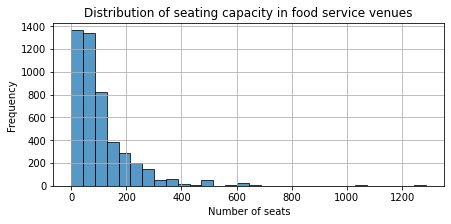

In [32]:
plt.figure (figsize = (7,3))
df['seats'].plot(
        kind='hist',
        bins=30,
        alpha=0.75,
        edgecolor='black',
        rot=0)
plt.title('Distribution of seating capacity in food service venues')
plt.xlabel('Number of seats')
plt.ylabel('Frequency')
plt.grid()
plt.show()

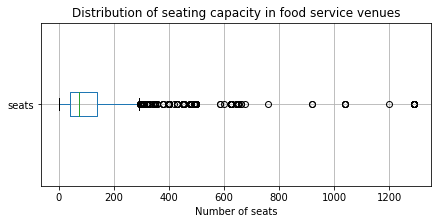

In [33]:
plt.figure (figsize = (7,3))
df.boxplot(column='seats', vert=False)
plt.title('Distribution of seating capacity in food service venues')
plt.xlabel('Number of seats')
plt.show()

The distribution of seating capacity is right-skewed, with a large number of outliers.

Next, we analyze these outliers:

In [34]:
df[df['seats'] > 500]['seats'].value_counts()

625.0     23
1288.0    11
650.0      6
1040.0     4
660.0      2
585.0      2
644.0      2
920.0      2
1200.0     1
600.0      1
675.0      1
760.0      1
Name: seats, dtype: int64

In [35]:
df[df['seats'] > 1000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
2713,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 11:00–06:00",4.2,0,1040.0,высокие,Средний счёт:1000–2500 ₽,1750.0,NaN,False
2722,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"ежедневно, 10:00–22:00",4.3,1,1040.0,NaN,NaN,NaN,NaN,False
2770,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,1,1040.0,NaN,NaN,NaN,NaN,False
2966,6b611f2fc2084078952aaef40780f11c,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",Восточный административный округ,NaN,4.0,0,1040.0,NaN,NaN,NaN,NaN,False
4231,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",Западный административный округ,"ежедневно, 12:00–23:00",4.2,0,1200.0,высокие,Средний счёт:2500–5000 ₽,3750.0,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,False
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,False


In [36]:
df[df['name']== 'one price coffee']['seats'].value_counts()

200.0     2
180.0     2
100.0     2
300.0     2
150.0     2
95.0      2
75.0      2
250.0     2
140.0     2
0.0       2
45.0      1
99.0      1
70.0      1
90.0      1
176.0     1
42.0      1
110.0     1
82.0      1
30.0      1
60.0      1
48.0      1
64.0      1
230.0     1
320.0     1
28.0      1
178.0     1
160.0     1
15.0      1
55.0      1
1288.0    1
107.0     1
350.0     1
120.0     1
50.0      1
189.0     1
112.0     1
40.0      1
65.0      1
18.0      1
27.0      1
85.0      1
10.0      1
14.0      1
Name: seats, dtype: int64

In [37]:
df[df['name']== 'шоколадница']['seats'].value_counts()

100.0     6
48.0      6
80.0      5
96.0      4
120.0     3
150.0     3
49.0      3
140.0     3
64.0      2
320.0     2
180.0     2
220.0     2
130.0     2
70.0      2
60.0      2
144.0     2
45.0      2
300.0     2
143.0     2
94.0      1
50.0      1
98.0      1
58.0      1
174.0     1
276.0     1
230.0     1
190.0     1
200.0     1
68.0      1
65.0      1
176.0     1
61.0      1
43.0      1
480.0     1
110.0     1
44.0      1
650.0     1
40.0      1
217.0     1
76.0      1
1040.0    1
62.0      1
55.0      1
67.0      1
92.0      1
75.0      1
25.0      1
Name: seats, dtype: int64

We estimate the typical number of seats per venue:

In [38]:
df.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

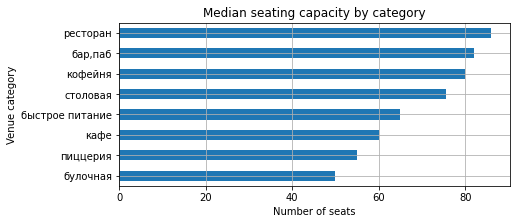

In [39]:
plt.figure (figsize = (7,3))
df.groupby('category')['seats'].median().sort_values(ascending=True).plot(
                kind='barh',
                title='Median seating capacity by category',
                rot=0,
                legend=False)
plt.xlabel('Number of seats')
plt.ylabel('Venue category')
plt.grid()
plt.show()

The distribution of seating capacity is right-skewed, with a large number of outliers above approximately 300 seats. Some of these values may be valid and correspond to large banquet venues. However, examples from chain venues (e.g., Shokoladnitsa and One Price Coffee) suggest that extremely high values are likely data errors, as they significantly exceed seating capacities observed in other venues within the same chains.

To estimate a typical seating capacity, we rely on the median to reduce the impact of outliers. The **median number** of seats ranges from **50** (bakeries) to **86** (restaurants).

---

### 3.5 Analysis of average venue ratings

In [40]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float32

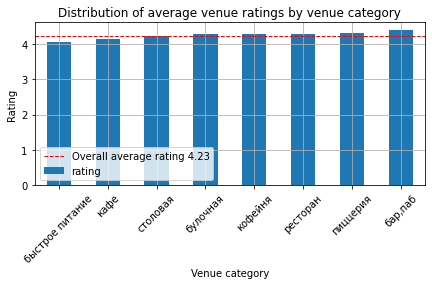

In [41]:
plt.figure (figsize = (7,3))
df.groupby('category')['rating'].mean().sort_values(ascending=True).plot(
                kind='bar',
                title='Distribution of average venue ratings by venue category',
                rot=45)
mean_rating = df['rating'].mean()
plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Overall average rating {mean_rating:.2f}')
plt.xlabel('Venue category')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()

Mean ratings are relatively consistent across categories and fluctuate around the overall average of 4.23. At the same time, bars/pubs, pizzerias, and restaurants demonstrate slightly higher average ratings, whereas fast food establishments show the lowest average rating.

---

### 3.6 Analysis of factors influencing venue ratings

Since we need to assess relationships between both numerical and categorical variables, we apply the phi_k correlation coefficient, which is suitable for mixed data types:

In [42]:
correlation_matrix = df[['rating','category','district','chain','seats','price','is_24_7']].phik_matrix()

print('Phi_k correlation matrix for the `rating` variable:')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Phi_k correlation matrix for the `rating` variable:


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


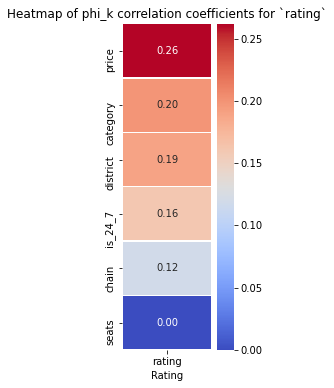

In [43]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=True
           )

plt.title('Heatmap of phi_k correlation coefficients for `rating`')
plt.xlabel('Rating')
plt.show()

The strongest correlation of venue ratings is observed with price category (phi_k = 0.26). We further explore this relationship:

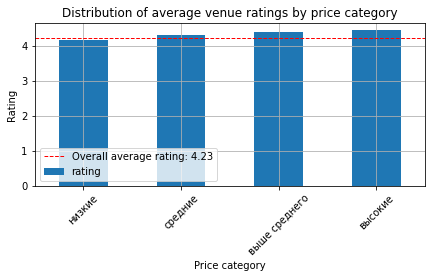

In [44]:
plt.figure (figsize = (7,3))
df.groupby('price')['rating'].mean().sort_values(ascending=True).plot(
                kind='bar',
                title='Distribution of average venue ratings by price category',
                rot=45)
mean_rating = df['rating'].mean()
plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Overall average rating: {mean_rating:.2f}')
plt.xlabel('Price category')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'Rating')

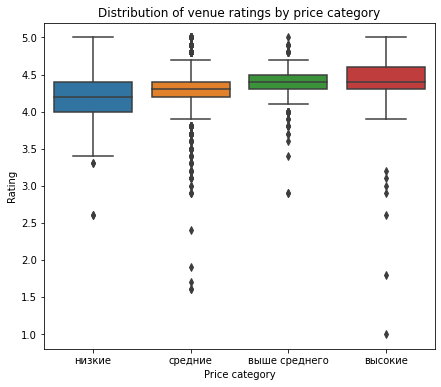

In [45]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df, x='price', y='rating', order=['низкие', 'средние', 'выше среднего', 'высокие'])
plt.title('Distribution of venue ratings by price category')
plt.xlabel('Price category')
plt.ylabel('Rating')

The strongest correlation of venue ratings is observed with price category (phi_k = 0.26).

The distribution of ratings across price categories confirms this relationship: both the mean and median ratings increase as the price category rises.  

This indicates a moderate **positive association between a venue’s rating and its price category**.

---

### 3.7 Analysis of popular chains

In [46]:
top_chains = df[df['chain'] == 1].groupby('name').agg(count=('id', 'count'),avg_rating=('rating', 'mean'),category=('category', 'first')).sort_values(by='count', ascending=False)
top_15_chains = top_chains.head(15)
top_15_chains

,count,avg_rating,category
name,,,
шоколадница,120,4.177500,кофейня
домино'с пицца,76,4.169737,пиццерия
додо пицца,74,4.286487,пиццерия
one price coffee,71,4.064789,кофейня
яндекс лавка,69,3.872464,ресторан
cofix,65,4.075385,кофейня
prime,50,4.116000,ресторан
хинкальная,44,4.322727,быстрое питание
кофепорт,42,4.147619,кофейня


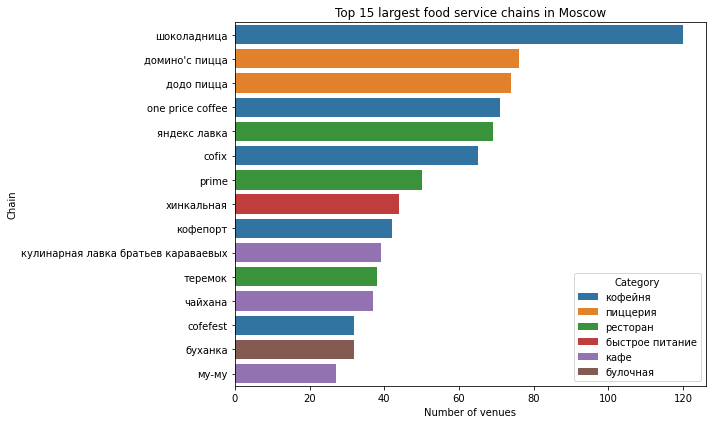

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_15_chains.reset_index(), x='count', y='name', hue='category', dodge=False)
plt.xlabel('Number of venues')
plt.ylabel('Chain')
plt.title('Top 15 largest food service chains in Moscow')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

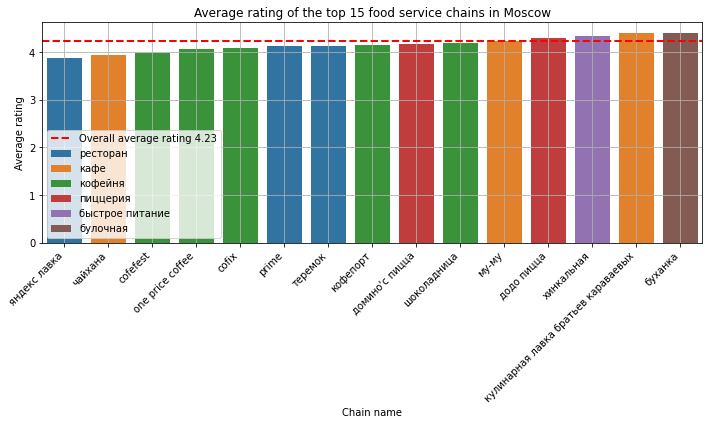

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_15_chains.reset_index().sort_values(by='avg_rating'), x='name', y='avg_rating', hue='category', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average rating')
plt.xlabel('Chain name')
plt.title('Average rating of the top 15 food service chains in Moscow')

plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Overall average rating {mean_rating:.2f}')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

We identified the top 15 most popular food service chains in Moscow based on the number of venues in the region. The list includes 5 coffee shop chains, 3 cafés, 3 restaurants, 2 pizzerias, 1 fast-food chain, and 1 bakery. 

Only 4 chains have an average rating above the overall market average (4.23): Dodo Pizza, Khinkalnaya, Kulinarnaia Lavka Bratyev Karavaevykh, and Bukhanka.

---

### 3.8 Analysis of average bill levels

In [49]:
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

We focus on the median value, as the mean is right-skewed due to the presence of outliers:

In [50]:
df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

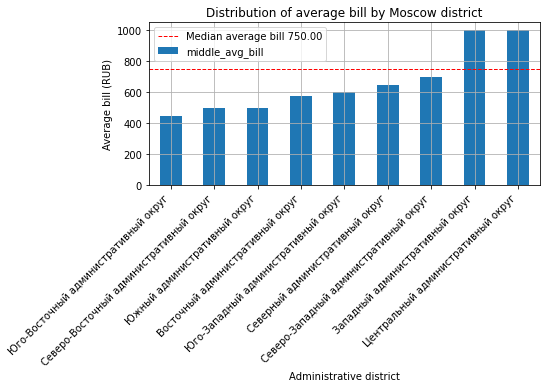

In [51]:
plt.figure (figsize = (7,3))
df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=True).plot(
                kind='bar',
                title='Distribution of average bill by Moscow district',
                ylabel='Average bill (RUB)',
                xlabel='Administrative district')
median_avg_bill = df['middle_avg_bill'].median()
plt.axhline(median_avg_bill,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Median average bill {median_avg_bill:.2f}')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Administrative district')

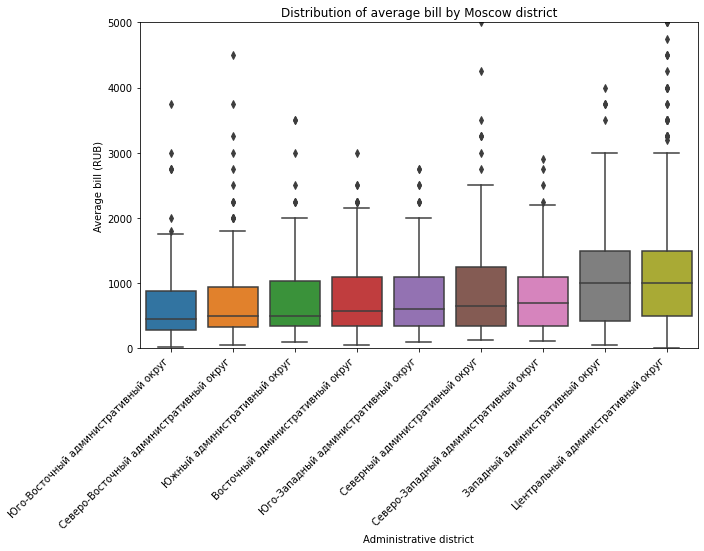

In [52]:
order = df.groupby('district')['middle_avg_bill'].median().sort_values().index
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='district', y='middle_avg_bill',order=order)
plt.title('Distribution of average bill by Moscow district')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5000)
plt.ylabel('Average bill (RUB)')
plt.xlabel('Administrative district')

---


The highest median average bill is observed in the Central and Western Administrative Districts (₽1,000). The North-Western Administrative District follows with a median of ₽700. This suggests that **proximity to the city center is associated with higher prices**: the closer a venue is to the center, the higher the average bill.

---

### 3.9 Interim conclusions

Key findings from the exploratory data analysis include:

- **The top 3 food service categories** in Moscow are **cafés** (2,376 venues), **restaurants** (2,042), and **coffee shops** (1,413). The least represented categories are canteens (315) and bakeries (256).
- **The highest concentration of venues is observed in the Central Administrative District** (2,242). Other districts typically host between 700 and 900 venues, while the North-Western Administrative District has the fewest (409).
- **Independent venues outnumber chain venues** (approximately 62% vs. 38%). Chain formats are most common among coffee shops, pizzerias, and bakeries.
- **Typical seating capacity** ranges from **50 seats** (bakeries) **to 86 seats** (restaurants).
- **Average ratings** vary only slightly across categories and **cluster around the overall mean of 4.23**. Bars/pubs, pizzerias, and restaurants show the highest average ratings, while fast-food venues have the lowest.
- **Venue ratings show a moderate positive association with price level**: higher-priced venues tend to have higher ratings.
- The top 15 most popular chains in Moscow are led by Shokoladnitsa, Domino’s Pizza, and Dodo Pizza. Coffee shop chains account for roughly one-third of this list.
- **Location affects pricing**: venues closer to the city center tend to have higher average bills. The Central and Western Administrative Districts show the highest median average bill (₽1,000).

<a id='final-conclusions-and-recommendations'></a>
## 4. Final conclusions and recommendations

This analysis covers **8,402 food service venues in Moscow** as of summer 2022. The dataset included key venue attributes such as name, address, district, category, rating, chain affiliation, as well as information on price segment and average bill size.  

The objective was to explore the Moscow food service market and identify patterns that could support data-driven investment decisions for opening a new venue in the city.

### 4.1 Key market insights

- **Venue category:** The most prevalent food service categories in Moscow are cafés, restaurants, and coffee shops, indicating strong and stable demand.
- **Location:** Venues are unevenly distributed across the city. Venue density is highest in the Central Administrative District (2,242 venues, approximately 27% of the total). Other districts typically host between 400 and 900 venues.
- **Chain presence:** Independent venues dominate the market (62% vs. 38% chain venues). However, coffee shops, pizzerias, and bakeries are more often represented as chains, suggesting higher scalability for these formats.
- **Seating capacity:** Typical seating capacity ranges from 50 seats (bakeries) to 86 seats (restaurants).
- **Ratings:** Average ratings are consistent across categories, clustering around a mean of 4.32. Bars/pubs, pizzerias, and restaurants demonstrate slightly higher average ratings, while fast-food venues have the lowest.
- **Price category:** A moderate positive relationship exists between rating and price category: higher-priced venues tend to receive higher customer ratings, potentially reflecting better service and product quality.
- **Geography and pricing:** Average bill size increases with proximity to the city center. The Central and Western Administrative Districts lead in median average bill size (₽1,000).

### 4.2. Recommendations

Investors may consider launching a **café, coffee shop, or restaurant**, as these formats demonstrate the highest demand and are well suited for initial market entry.

With sufficient budget, the **Central Administrative District** offers the highest foot traffic and the highest average bill. If budget constraints are a concern, districts outside the city center, such as the **Western Administrative District**, can be a viable alternative, combining relatively high average bill with adequate venue density and potentially lower rental costs.

It is advisable to target the **mid-range and above-average price segments**, as venues in these categories tend to receive higher customer ratings.

In terms of capacity, a venue size of **50–86 seats** appears sufficient for cafés, coffee shops, and restaurants.

In the **coffee shop segment**, successful performance of the first location may justify further expansion using a **chain-based growth strategy**.